# This is to use CAPM on Monte Carlo Simualted data to generate an Optimal Portfolio of Index Funds

In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv(r'./load_data/data/dropped_data.csv')

In [6]:
data.iloc[0:5]

,Unnamed: 0,dates,VTSMX,VFINX,VIVAX,VIMSX,VMVIX,NAESX,VISVX,VDAIX,...,GLD,PCRIX,EMB,PIGLX,VICSX,VBMFX,VIPSX,VWITX,VFSTX,VFISX
0,0,2019-05-17,71.63,266.13,42.40,44.54,42.83,74.12,31.26,44.76,...,121.51,6.03,109.21,8.92,23.48,10.70,12.94,14.30,10.61,10.52
1,1,2019-05-16,70.99,263.70,42.05,44.18,42.56,73.58,31.09,44.37,...,122.39,5.98,109.19,8.94,23.50,10.71,12.96,14.29,10.62,10.53
2,2,2019-05-15,70.58,262.12,41.96,44.00,42.49,73.32,31.05,44.22,...,122.46,5.95,108.79,8.93,23.44,10.69,12.94,14.28,10.61,10.52
3,3,2019-05-14,69.95,260.01,41.69,43.54,42.13,72.44,30.73,43.94,...,122.67,5.87,108.45,8.93,23.45,10.70,12.93,14.27,10.61,10.52
4,4,2019-05-13,71.75,266.43,42.55,44.68,43.16,74.69,31.61,44.78,...,121.43,5.89,109.33,8.95,23.38,10.67,12.89,14.26,10.60,10.51


In [7]:
data= data.drop(columns="Unnamed: 0")
data.iloc[0:5]

,dates,VTSMX,VFINX,VIVAX,VIMSX,VMVIX,NAESX,VISVX,VDAIX,VGSIX,...,GLD,PCRIX,EMB,PIGLX,VICSX,VBMFX,VIPSX,VWITX,VFSTX,VFISX
0,2019-05-17,71.63,266.13,42.40,44.54,42.83,74.12,31.26,44.76,29.27,...,121.51,6.03,109.21,8.92,23.48,10.70,12.94,14.30,10.61,10.52
1,2019-05-16,70.99,263.70,42.05,44.18,42.56,73.58,31.09,44.37,29.11,...,122.39,5.98,109.19,8.94,23.50,10.71,12.96,14.29,10.62,10.53
2,2019-05-15,70.58,262.12,41.96,44.00,42.49,73.32,31.05,44.22,28.93,...,122.46,5.95,108.79,8.93,23.44,10.69,12.94,14.28,10.61,10.52
3,2019-05-14,69.95,260.01,41.69,43.54,42.13,72.44,30.73,43.94,28.84,...,122.67,5.87,108.45,8.93,23.45,10.70,12.93,14.27,10.61,10.52
4,2019-05-13,71.75,266.43,42.55,44.68,43.16,74.69,31.61,44.78,28.87,...,121.43,5.89,109.33,8.95,23.38,10.67,12.89,14.26,10.60,10.51


In [8]:
data.columns.tolist()[1:len(data.columns.tolist())]

summary = pd.DataFrame()
summary['funds'] = data.columns.tolist()[1:len(data.columns.tolist())]

In [9]:
summary.head()

,funds
0,VTSMX
1,VFINX
2,VIVAX
3,VIMSX
4,VMVIX


In [10]:
mean = []
sd_funds = []
for fund in summary['funds']:
    mean.append(np.mean(data[fund]))
    sd_funds.append(np.std(data[fund]))

summary['mean'] = mean
summary['std'] = sd_funds

summary.head()

,funds,mean,std
0,VTSMX,54.033903,10.169546
1,VFINX,199.351460,37.996726
2,VIVAX,33.816144,5.597419
3,VIMSX,34.620364,6.126259
4,VMVIX,35.720852,5.967815


In [11]:
# expected returns
reversed_d = data.reindex(index=data.index[::-1])

table = reversed_d.set_index('dates')

In [12]:
table

,VTSMX,VFINX,VIVAX,VIMSX,VMVIX,NAESX,VISVX,VDAIX,VGSIX,VCSAX,...,GLD,PCRIX,EMB,PIGLX,VICSX,VBMFX,VIPSX,VWITX,VFSTX,VFISX
dates,,,,,,,,,,,,,,,,,,,,,
2014-10-13,36.56,135.30,23.30,22.65,23.26,39.36,17.66,24.25,22.76,44.97,...,171.31,14.56,120.50,10.66,23.38,11.13,14.92,14.28,10.84,10.79
2014-10-14,36.50,135.13,23.26,22.54,23.17,39.23,17.60,24.23,22.53,45.17,...,171.80,14.76,120.74,10.64,23.42,11.14,14.91,14.29,10.84,10.79
2014-10-15,36.55,135.29,23.28,22.61,23.24,39.23,17.61,24.25,22.41,45.32,...,170.40,14.42,120.57,10.62,23.46,11.15,14.91,14.32,10.84,10.79
2014-10-16,36.49,135.24,23.30,22.51,23.15,39.00,17.53,24.25,22.07,45.52,...,171.72,14.28,120.69,10.62,23.46,11.15,14.88,14.34,10.85,10.79
2014-10-17,36.34,134.57,23.16,22.51,23.13,39.11,17.56,24.08,21.90,45.38,...,171.74,14.24,120.81,10.66,23.50,11.16,14.89,14.35,10.84,10.79
2014-10-18,36.24,134.27,23.15,22.42,23.09,38.92,17.53,24.09,21.85,45.45,...,171.47,14.04,120.73,10.66,23.54,11.18,14.88,14.35,10.85,10.79
2014-10-19,35.84,132.88,22.93,22.09,22.76,38.33,17.26,23.87,21.52,45.13,...,171.96,14.18,120.98,10.68,23.58,11.20,14.91,14.36,10.85,10.79
2014-10-20,35.64,132.14,22.83,21.95,22.65,38.10,17.18,23.79,21.51,45.10,...,171.05,14.04,120.66,10.70,23.63,11.21,14.95,14.38,10.85,10.79
2014-10-21,35.99,133.43,23.01,22.19,22.83,38.56,17.32,23.95,21.61,45.30,...,170.77,14.10,120.63,10.69,23.54,11.20,14.87,14.40,10.85,10.79


In [13]:
# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

In [14]:
returns_annual['VTSMX']

0.10880048506033245

In [15]:
cov_annual['VTSMX']['VTSMX']

0.017010469135554665

In [16]:
selected = table.columns.tolist()

In [17]:
# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
index_weights = []
sharpe_ratio = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 100000

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    index_weights.append(weights)

In [18]:
port_returns[0:5]

[0.03392710988414383,
 0.04195677015589276,
 0.04238208472639529,
 0.022995677506860338,
 0.035565058890737355]

In [19]:
#a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in index_weights]

In [20]:
# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [fund+' Weight' for fund in selected]

# reorder dataframe columns
df = df[column_order]

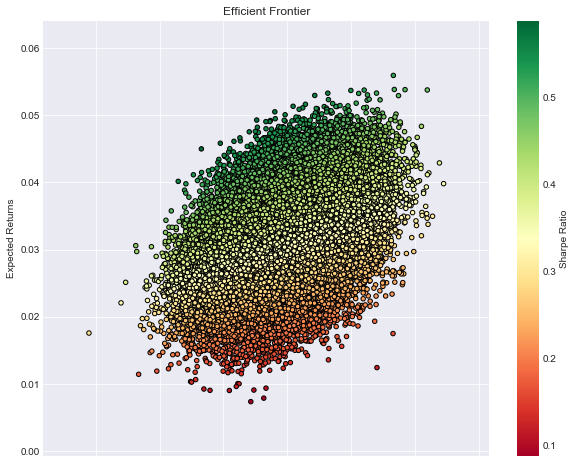

In [21]:
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [22]:
df

,Returns,Volatility,Sharpe Ratio,VTSMX Weight,VFINX Weight,VIVAX Weight,VIMSX Weight,VMVIX Weight,NAESX Weight,VISVX Weight,...,GLD Weight,PCRIX Weight,EMB Weight,PIGLX Weight,VICSX Weight,VBMFX Weight,VIPSX Weight,VWITX Weight,VFSTX Weight,VFISX Weight
0,0.033927,0.088910,0.381591,0.046179,0.045859,0.038078,0.034044,0.013418,0.034503,0.041281,...,0.051888,0.031989,0.000492,0.031233,0.032249,0.048930,0.041457,0.010374,0.046438,0.026431
1,0.041957,0.096334,0.435533,0.044255,0.023392,0.032412,0.039104,0.015524,0.027978,0.050976,...,0.011466,0.019148,0.051761,0.013077,0.028056,0.003766,0.000333,0.031822,0.024789,0.051541
2,0.042382,0.090147,0.470142,0.044759,0.041823,0.011121,0.040107,0.035259,0.030889,0.057768,...,0.041223,0.018114,0.015308,0.005897,0.034943,0.004792,0.038917,0.002696,0.025569,0.061381
3,0.022996,0.097574,0.235674,0.004076,0.007107,0.022057,0.060519,0.044960,0.016963,0.017840,...,0.022274,0.056202,0.026203,0.044047,0.035055,0.020397,0.012871,0.023245,0.046600,0.005208
4,0.035565,0.089447,0.397610,0.035572,0.060269,0.036823,0.001332,0.023716,0.037999,0.059216,...,0.053636,0.017938,0.044402,0.026744,0.026843,0.048094,0.008374,0.055318,0.025973,0.014525
5,0.023061,0.084600,0.272585,0.006057,0.010664,0.040220,0.038062,0.030530,0.014649,0.009229,...,0.030512,0.040088,0.043371,0.048359,0.022593,0.057372,0.052414,0.018525,0.048105,0.012581
6,0.032538,0.088218,0.368837,0.037770,0.001619,0.040313,0.028401,0.051351,0.011957,0.047296,...,0.037867,0.000246,0.030039,0.009792,0.045177,0.048006,0.043477,0.021456,0.010277,0.047705
7,0.036373,0.091159,0.399005,0.031472,0.058819,0.039859,0.014838,0.038158,0.050553,0.052321,...,0.055887,0.009253,0.020866,0.027559,0.014001,0.030002,0.043096,0.033162,0.053632,0.012332
8,0.022204,0.091300,0.243193,0.017370,0.031999,0.009926,0.003451,0.016984,0.026177,0.050161,...,0.056518,0.059933,0.016700,0.016513,0.010356,0.040876,0.010412,0.046420,0.044325,0.034672
9,0.028860,0.094633,0.304968,0.022977,0.054267,0.035764,0.009017,0.030008,0.045076,0.051123,...,0.022800,0.054041,0.029630,0.019889,0.028513,0.021278,0.036163,0.018730,0.038888,0.014703


In [23]:
data_tbill = pd.read_csv(r'./load_data/data/USTREASURY-YIELD.csv')

In [24]:
data_tbill.head()

,Date,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
0,2019-05-24,2.37,2.38,2.35,2.39,2.33,2.16,2.10,2.12,2.22,2.32,2.57,2.75
1,2019-05-23,2.38,2.38,2.37,2.40,2.32,2.12,2.08,2.11,2.20,2.31,2.56,2.75
2,2019-05-22,2.36,2.37,2.38,2.41,2.37,2.23,2.17,2.19,2.28,2.39,2.64,2.82
3,2019-05-21,2.37,2.38,2.39,2.42,2.36,2.26,2.20,2.23,2.33,2.43,2.67,2.84
4,2019-05-20,2.39,2.39,2.39,2.42,2.34,2.21,2.17,2.21,2.30,2.41,2.65,2.83


In [25]:
reversed_d = data_tbill.reindex(index=data.index[::-1])

data['dates'] = pd.to_datetime(data['dates'])

max_date = max(data['dates'])
min_date = min(data['dates'])

In [26]:

data_tbill['Date'] = pd.to_datetime(data_tbill['Date'])

mask = (data_tbill['Date'] > min_date) & (data_tbill['Date'] <= max_date)
data_tbill = data_tbill.loc[mask]

In [27]:
data_tbill.head()

,Date,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
5,2019-05-17,2.39,2.40,2.39,2.42,2.33,2.20,2.15,2.17,2.27,2.39,2.63,2.82
6,2019-05-16,2.40,2.41,2.40,2.43,2.33,2.20,2.15,2.18,2.28,2.40,2.65,2.84
7,2019-05-15,2.40,2.41,2.42,2.43,2.30,2.16,2.12,2.15,2.25,2.37,2.63,2.82
8,2019-05-14,2.41,2.42,2.41,2.43,2.32,2.20,2.17,2.20,2.30,2.42,2.67,2.86
9,2019-05-13,2.41,2.42,2.41,2.42,2.32,2.18,2.15,2.18,2.28,2.40,2.65,2.83


In [28]:


table= reversed_d.set_index('Date')

In [29]:
table.head()

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
2012-09-06,0.10,NaN,0.11,0.14,0.18,0.27,0.34,0.68,1.12,1.68,2.41,2.80
2012-09-07,0.09,NaN,0.11,0.14,0.18,0.25,0.33,0.64,1.09,1.67,2.42,2.81
2012-09-10,0.09,NaN,0.10,0.14,0.18,0.25,0.33,0.66,1.10,1.68,2.43,2.83
2012-09-11,0.09,NaN,0.10,0.14,0.18,0.25,0.33,0.67,1.12,1.70,2.44,2.84
2012-09-12,0.09,NaN,0.10,0.13,0.18,0.25,0.33,0.70,1.17,1.77,2.52,2.92


In [30]:
np.mean(table['3 MO'])/100 * 4

0.026082479141835556

In [31]:
weights = [0]*len(returns_annual)
weights[0] = 1
weights /= np.sum(weights)
returns = np.dot(weights, returns_annual)
volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
sharpe = returns / volatility 
sharpe

0.8342048028441877

In [ ]:

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    index_weights.append(weights)

In [32]:
risk_free = np.mean(table['3 MO'])/100 * 4  # This can change, 3 month T-bill yield

weights = [0]*np.shape(cov_annual)[0]
weights[0] = 1
weights = np.array(weights)
sigma_T = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))

def beta(stock):
    beta = cov_annual[stock]['VTSMX']/cov_annual['VTSMX']['VTSMX']

def CML(beta):
    # r_f + (R_T-r_f)/(sigma_T) * sigma_p
    # ?_T indicattes a property of market returns (VTSMX?)
    return -risk_free + sharpe*beta




In [37]:
for n in range(0,num_assets):
    print(n)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


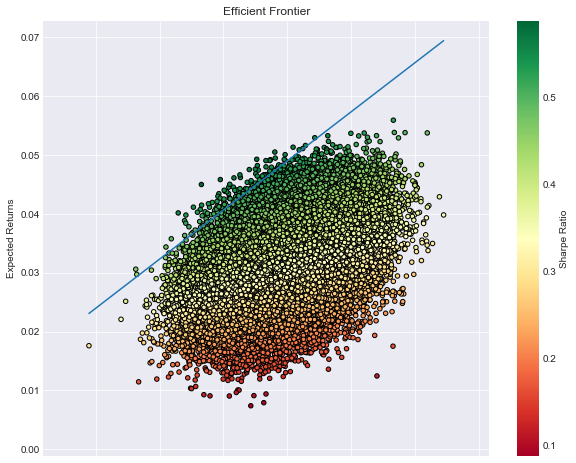

In [39]:
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
x_base = np.linspace(min(df['Volatility']), max(df['Volatility']), num=100)
plt.plot(x_base, CML(x_base))
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [46]:
best_port_idx = np.abs(df['Returns'].values - CML(df['Volatility'].values)).argsort()[:100]

In [68]:
CAPM_ports = df.iloc[best_port_idx]
max_sr_idx = CAPM_ports['Sharpe Ratio'].idxmax()
df.iloc[max_sr_idx].Returns
df.iloc[max_sr_idx].Volatility

0.09430256385614935

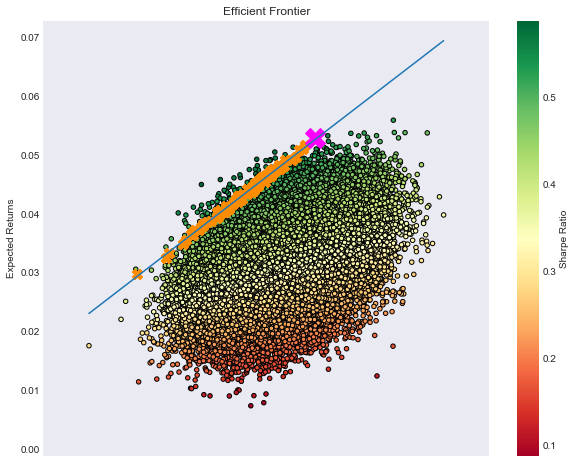

In [69]:
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
ax = df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
df.iloc[best_port_idx].plot.scatter(
                x='Volatility', y='Returns', c='DarkOrange', s=100, marker='X',
                ax=ax)
df.iloc[best_port_idx].plot.scatter(
                x='Volatility', y='Returns', c='DarkOrange', s=100, marker='X',
                ax=ax)
plt.plot(df.iloc[max_sr_idx].Volatility, df.iloc[max_sr_idx].Returns, marker = 'X', markersize=20, c='Magenta')
x_base = np.linspace(min(df['Volatility']), max(df['Volatility']), num=100)
plt.plot(x_base, CML(x_base))
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [70]:
df.iloc[max_sr_idx].to_csv(r'./portfolio/capm_portfolios.csv')

In [ ]:
weight_arr = []
for n in range(0,num_assets):
    temp = [0.]*num_assets
    temp[n] = 1.
    weight_arr.append(temp)


# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(0,len(weight_arr)):
    weights = weight_arr[single_portfolio]
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    index_weights.append(weights)